In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

## Lab 2: Probability, Distributions, and Statistical Questions

### Problem 1

Considering that the background cosmic rays have a Poisson distribution, we take X which is average cosmic ray background on a given day to be 3.2. Similarly, we take Y which is the average number of gamma rays emitted to be 8.

In [2]:
# X is the average cosmic-ray background for 1 day
X = 3.2
# Y is the average gamma-rays emitted by the source
Y = 8

Now we can visualize the probability distribution of the background cosmic rays and get a general understanding of how likely we are to observe a certain amount of cosmic rays.

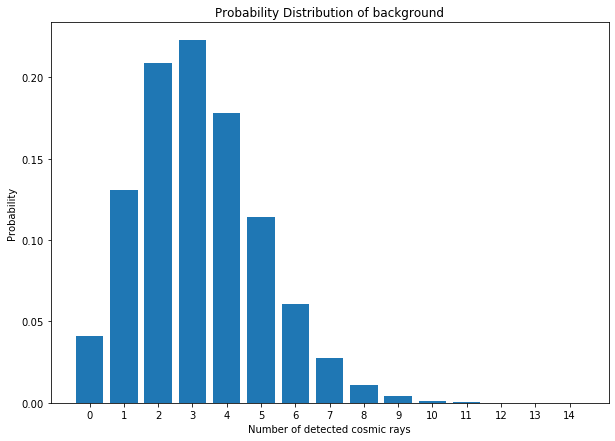

In [13]:
# Create the poisson distribution for the background
dist = stats.poisson(X)
x = np.arange(0,15)

# Create the probability distribution for values up to 15
pmf = dist.pmf(x)

# Plot the probability distribution of the background
plt.bar(x, pmf)
plt.xlabel('Number of detected cosmic rays')
plt.ylabel('Probability')
plt.title('Probability Distribution of background')
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(10, 7)

From the plot we can see that we are most likely to detect 3 cosmic rays which is consistent with the chosen expected value of the Poisson distribution.

Next, to see how the distribution changes over more days, we convolve the distribution for a given amount of days. Here we convolve it with itself till 5 days have passed.

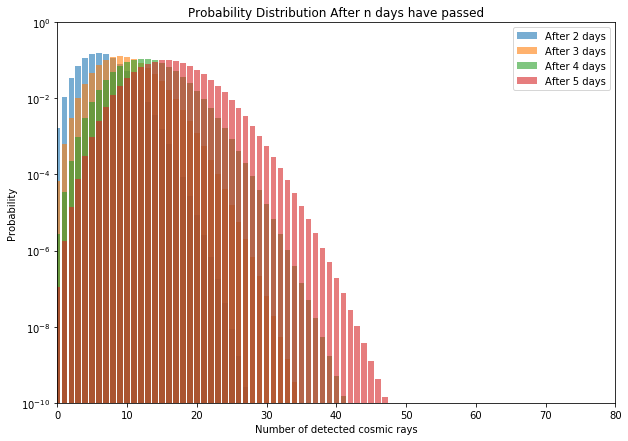

In [14]:
# Create array to loop over for each passing day
n_days = np.arange(1, 5)

# Loop to plot change over days
for i in n_days:
    new_pmf = pmf
    for j in range(i):
        new_pmf = np.convolve(new_pmf, pmf)
    plt.bar(range(len(new_pmf)), new_pmf, alpha = 0.6, label = 'After ' + str(i + 1) + ' days')
    plt.yscale('log')
    plt.xlim(0,80)
    plt.ylim(1e-10, 1)
    plt.title('Probability Distribution After n days have passed')
    plt.xlabel('Number of detected cosmic rays')
    plt.ylabel('Probability')
    plt.legend()
fig = plt.gcf()
fig.set_size_inches(10, 7)

As we can see, after each passing day the distribution's spread increases a little bit and it starts to slightly resemble a gaussian distribution. However, even after 5 days have passed the distribution still looks mostly like a Poisson distribution would look on the log y scale. Even though the downward parabolic shape is becoming slightly more apparent, the signature tail to the right is still the defining feature of the plot.

Now this makes sense since integrating over 5 days is essentially adding 5 independent Poisson distributions to each other which is still a Poisson distribution. Similarly, if we were to approach this mathematically we know that convolving the distribution with itself results in the same distribution, but with the parameter being summed the amount of times that we convolve the distribution together. [Source](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/pdfs/20%20ConvolutionAndConditional.pdf)

Now as we start to average days, we can observe how the distribution changes over different ranges of days

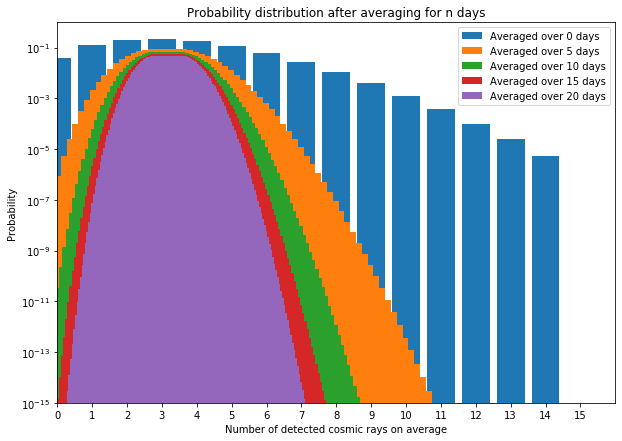

In [15]:
# Array of various day ranges
n_days_for_avg = [0, 5, 10, 15, 20]

# Loop to plot change in average over various days
for i in n_days_for_avg:
    new_pmf = pmf
    for j in range(i):
        new_pmf = np.convolve(new_pmf, pmf)
    plt.bar(np.arange(len(new_pmf)) / (i + 1), new_pmf, label = 'Averaged over ' + str(i) + ' days')
    plt.yscale('log')
    plt.xlim(0, 16)
    plt.ylim(1e-15, 1)
    plt.xticks(np.arange(0,16))
    plt.ylabel('Probability')
    plt.xlabel('Number of detected cosmic rays on average')
    plt.legend()
    plt.title('Probability distribution after averaging for n days')
fig = plt.gcf()
fig.set_size_inches(10, 7)

Like we saw earlier with the sum, as we start to average over multiple days the distribution starts resembling the gaussian distribution slightly. This occurs due to the Central Limit Theorem which states that by summing or averaging an adequately large amount of samples all distributions tend towards a gaussian distribution. It has a downward parabolic shape centered around the expected value of the distribution and since it has been averaged the variance has also decreased (HW2). However, the range of days that we have chosen still does not show a clear gaussian distribution. If we had taken a much larger range say a couple hundred days the plot would show a distribution that is much more gaussian. 

If we consider N to be 7 days that have passed, over these days we see N*Y = 56 gamma rays. In order to determine the sigma of this observation we need to first describe the question that we are asking. What is the probability that the cosmic ray background data gives us something resembling 56 or more gamma rays? The probability to for this to occur would be the integral from 56 to infinty of the probability distribution of the background. This can also be done by subtracting the integral of whatever is before 56 from 1 which is the method used below. 

In [19]:
# Pick value for N
N = 7
gamma_rays_observed = N * Y
prob =  1 - stats.poisson(N*X).cdf(gamma_rays_observed)
print('The probability for this to occur is ' + str(prob))

The probability for this to occur is 6.877266534033311e-10


In [24]:
sigma = stats.norm.ppf(1 - prob)
print('The sigma corresponding to this probability is ' + str(round(sigma, 2)) + 'σ')

The sigma corresponding to this probability is 6.06σ


This sigma value is significant since in physics sigma values over 5σ tend to be considered signifiacnt.

## Problem 2

Now we take another look at the rayleigh distribution that we looked at previously. We want to observe how the distribution changes as you average over different ranges of days.

We are observing a background rayleigh distribution that has a scale paramter of 2.

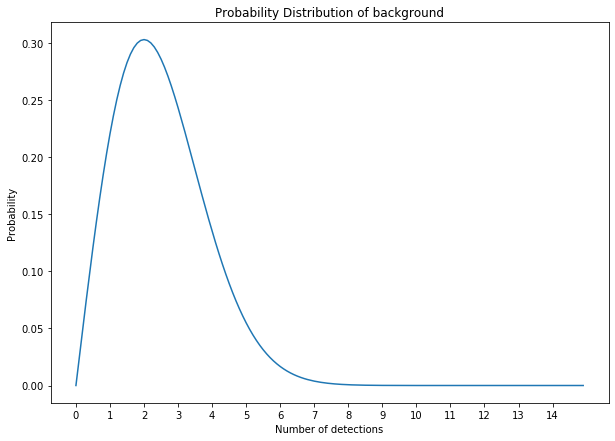

In [45]:
# Create the rayleigh distribution for the background
dist_2 = stats.rayleigh(scale = 2)
x2 = np.arange(0, 15, 0.1)

# Create the probability distribution for values up to 15
pdf = dist_2.pdf(x2)

# Plot the probability distribution of the background
plt.plot(x2, pdf)
plt.xlabel('Number of detections')
plt.ylabel('Probability')
plt.title('Probability Distribution of background')
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(10, 7)

Now we begin to average the distribution over multiple days.

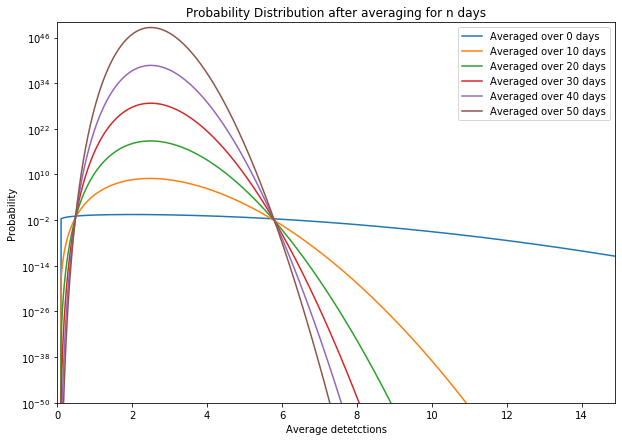

In [67]:
# Make array for multiple day ranges
days = [0, 10, 20, 30, 40, 50]

# Loop to plot changes over various days
for i in days:
    new_pdf = pdf
    for j in range(i):
        new_pdf = np.convolve(new_pdf, pdf)
    plt.plot(np.linspace(x2[0], x2[-1], len(new_pdf)), new_pdf, label = 'Averaged over ' + str(i) + ' days')
    plt.yscale('log')
    plt.xlim(x2[0], x2[-1])
    plt.ylim(1e-50, 1e50)
    plt.title('Probability Distribution after averaging for n days')
    plt.xlabel('Average detetctions')
    plt.ylabel('Probability')
    plt.legend()
fig = plt.gcf()
fig.set_size_inches(10, 7)

After averaging over all the above ranges we still do not see a clear gaussian distribution. However, with each passing day range the distribution becomes narrower and higher which is similar to saying that it is becoming more gaussian.

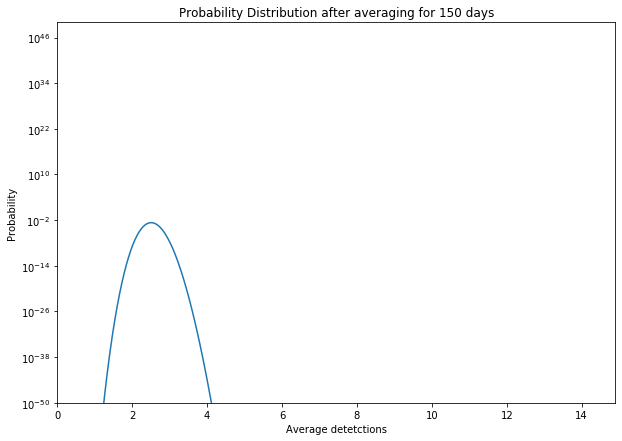

In [87]:
large_day_val = 175
new_pdf = pdf / 10
for j in range(large_day_val):
    new_pdf = np.convolve(new_pdf, pdf / 10)
plt.plot(np.linspace(x2[0], x2[-1], len(new_pdf)), new_pdf)
plt.yscale('log')
plt.xlim(x2[0], x2[-1])
plt.ylim(1e-50, 1e50)
plt.title('Probability Distribution after averaging for 150 days')
plt.xlabel('Average detetctions')
plt.ylabel('Probability')
fig = plt.gcf()
fig.set_size_inches(10, 7)

After roughly 175 convolutions, this distribution starts to accurately resemble the gaussian distribution.

### Problem 3

### Version 1
You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in.

We find that width is 5 units. The background distribution is also gaussian.

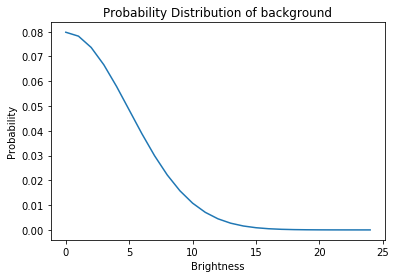

In [92]:
dist_3 = stats.norm(scale=5)

x3 = np.arange(0, 25)
plt.title('Probability Distribution of background')
plt.xlabel('Brightness')
plt.ylabel('Probability')
plt.plot(x3, dist_3.pdf(x3))


We detect a signal of strength 22.3. The statistical question that we ask is what is the probability that the background data produced an observation that is as signal-like or more signal-like than 22.3 units? Now to answer this we must integrate the distribution from 22.3 to infinity. Like we did earlier, we find the probability for this to occur.

In [95]:
prob_2 =  1 - dist_3.cdf(22.3)
print('The probability for this to occur is ' + str(prob_2))

The probability for this to occur is 4.097982646666942e-06


In [98]:
sigma_2 = stats.norm.ppf(1-prob_2)
print('The sigma corresponding to this probability is ' + str(round(sigma_2, 2)) + 'σ')

The sigma corresponding to this probability is 4.46σ


Since our calculated sigma is less than 5σ, our finding is not significant and we cannot claim a discovery.

### Version 2
You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.

Now when we are looking over 10k pixels, our probability distribution's shape stays the same as it was for one pixel; however, since we now are looking over 10,000 pixels the height becomes a lot bigger.

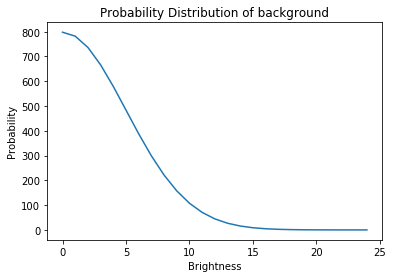

In [99]:
x3 = np.arange(0, 25)
plt.title('Probability Distribution of background')
plt.xlabel('Brightness')
plt.ylabel('Probability')
plt.plot(x3,10000 * dist_3.pdf(x3))

Now if we take the same signal from last time (22.3) in this case, our statistical question changes to what is the probability that the background data of 10,000 pixels produced an observation that is as signal-like or more signal-like than 22.3? To find this we perform the same operations as last time, but over 10,000 pixels.

In [104]:
prob_3 = 1 - dist_3.cdf(22.3)
prob_3 = prob_3 * 10000
print('The probability for this to occur is ' + str(prob_3))

The probability for this to occur is 0.04097982646666942


In [105]:
sigma_3 = stats.norm.ppf(1-prob_3)
print('The sigma corresponding to this probability is ' + str(round(sigma_3, 2)) + 'σ')

The sigma corresponding to this probability is 1.74σ


Sadly, our sigma value still remains unsignificant and we can not claim a discovery.

### Problem 4

Now we will attempt to discover the signals that would make make for a significant discovery. For the 1st case in problem 3, we need to find the probability associated with 5σ and then reverse engineer the signal needed.

In [106]:
temp_prob = 1 - stats.norm.cdf(5)
print(temp_prob)

2.866515719235352e-07


In [110]:
sig1 = dist_3.ppf(1-temp_prob)
print('The smallest signal that would be required to make a significant finding would be ' + str(sig1))

The smallest signal that would be required to make a significant finding would be 24.99999999985088


For the second part the process is slightly different, we need to divide the associated probability by 10,000 to consider the effect of the additional pixels.

In [114]:
temp_prob_2 = temp_prob / 10000
sig2 = dist_3.ppf(1-temp_prob_2)
print('The smallest signal that would be required to make a significant finding over 10,000 pixels would be ' + str(sig2))

The smallest signal that would be required to make a significant finding over 10,000 pixels would be 32.752687434458274


In [117]:
inc_brightness = (sig2 - sig1)/sig1
inc_brightness = round(inc_brightness * 100, 3)
print('The signal must be at least ' +  str(inc_brightness) + '% to make a discovery if we have a trials factor of 10k.')

The signal must be at least 31.011% to make a discovery if we have a trials factor of 10k.


The increase in brightness is not that much since the chance of discovering a signal as bright is 1 in 10,000. This large probability is what is responsible for the change to not be too much.

Now we examine what happens if our trial factor changes by an order of magnitude

In [120]:
t_factors = [1e5, 1e6, 1e7]
temp_probs_3 = temp_prob / t_factors
sig3 = dist_3.ppf(1-temp_probs_3)
print('If we increase the trial factor by multiple orders of magnitude, the 5σ threshold becomes ' + str(sig3))

If we increase the trial factor by multiple orders of magnitude, the 5σ threshold becomes [34.43066126 36.03340718 37.5706857 ]


Here we can see that even after changing the order of magnitude the threshold does not change that dramatically. This is due to the extremely low probability that we observe such a signal in our background distribution.